In [1]:
import pandas as pd

# Data Collection

In [2]:
data = pd.read_csv("../data/housing.csv")

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# EDA

Option 01: manual EDA

Option 02: Automated EDA

In [4]:
from ydata_profiling import ProfileReport

In [5]:
profile = ProfileReport(data, title="Housing Data Profiling Report")
profile.to_file("Housing.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [9]:
import dtale

d = dtale.show(data)
d.open_browser()

# Create Train and Test Set

In [8]:
from sklearn.model_selection import train_test_split

# Randomly split the data into training and test sets
train, test = train_test_split(data, test_size=0.2, random_state=12312)

print(train.shape)
print(test.shape)

(16512, 10)
(4128, 10)


In [11]:
data["median_income"].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

In [13]:
import numpy as np

bins = [0.0, 1.5, 3.0, 4.5, 6.0, np.inf]

data["income_cat"] = pd.cut(data["median_income"], bins, labels=[1, 2, 3, 4, 5])

In [21]:
data[["median_income", "income_cat"]].sample(10)

,median_income,income_cat
12515,2.6619,2
6803,4.4828,3
5666,5.5181,4
20143,5.1155,4
17937,1.8242,2
9122,1.6724,2
12631,1.7235,2
7442,2.9712,2
16243,3.2891,3
6779,2.6098,2


In [33]:
assert len(data["income_cat"]) == len(data)

In [36]:
data["income_cat"].value_counts() / len(data)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

In [25]:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=12312)
strat_train_set, strat_test_set = train_test_split(
    data, test_size=0.2, random_state=12312, stratify=data["income_cat"]
)

In [38]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)


income_cat_proportions(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [27]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)


compare_props = pd.DataFrame(
    {
        "Overall": income_cat_proportions(data),
        "Stratified": income_cat_proportions(strat_test_set),
        "Random": income_cat_proportions(test_set),
    }
).sort_index()

compare_props["Rand. %error"] = (
    100 * compare_props["Random"] / compare_props["Overall"] - 100
)
compare_props["Strat. %error"] = (
    100 * compare_props["Stratified"] / compare_props["Overall"] - 100
)

compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
income_cat,,,,,
1,0.039826,0.039971,0.040940,2.798054,0.364964
2,0.318847,0.318798,0.312500,-1.990579,-0.015195
3,0.350581,0.350533,0.362645,3.441128,-0.013820
4,0.176308,0.176357,0.169331,-3.957131,0.027480
5,0.114438,0.114341,0.114583,0.127011,-0.084674


In [39]:
housing = strat_train_set.drop("income_cat", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

print(housing.shape)
print(housing_labels.shape)

(16512, 10)
(16512,)


# Data Cleaning

## Missing value handling

In [45]:
import missingno as msno
import matplotlib.pyplot as plt

%matplotlib inline

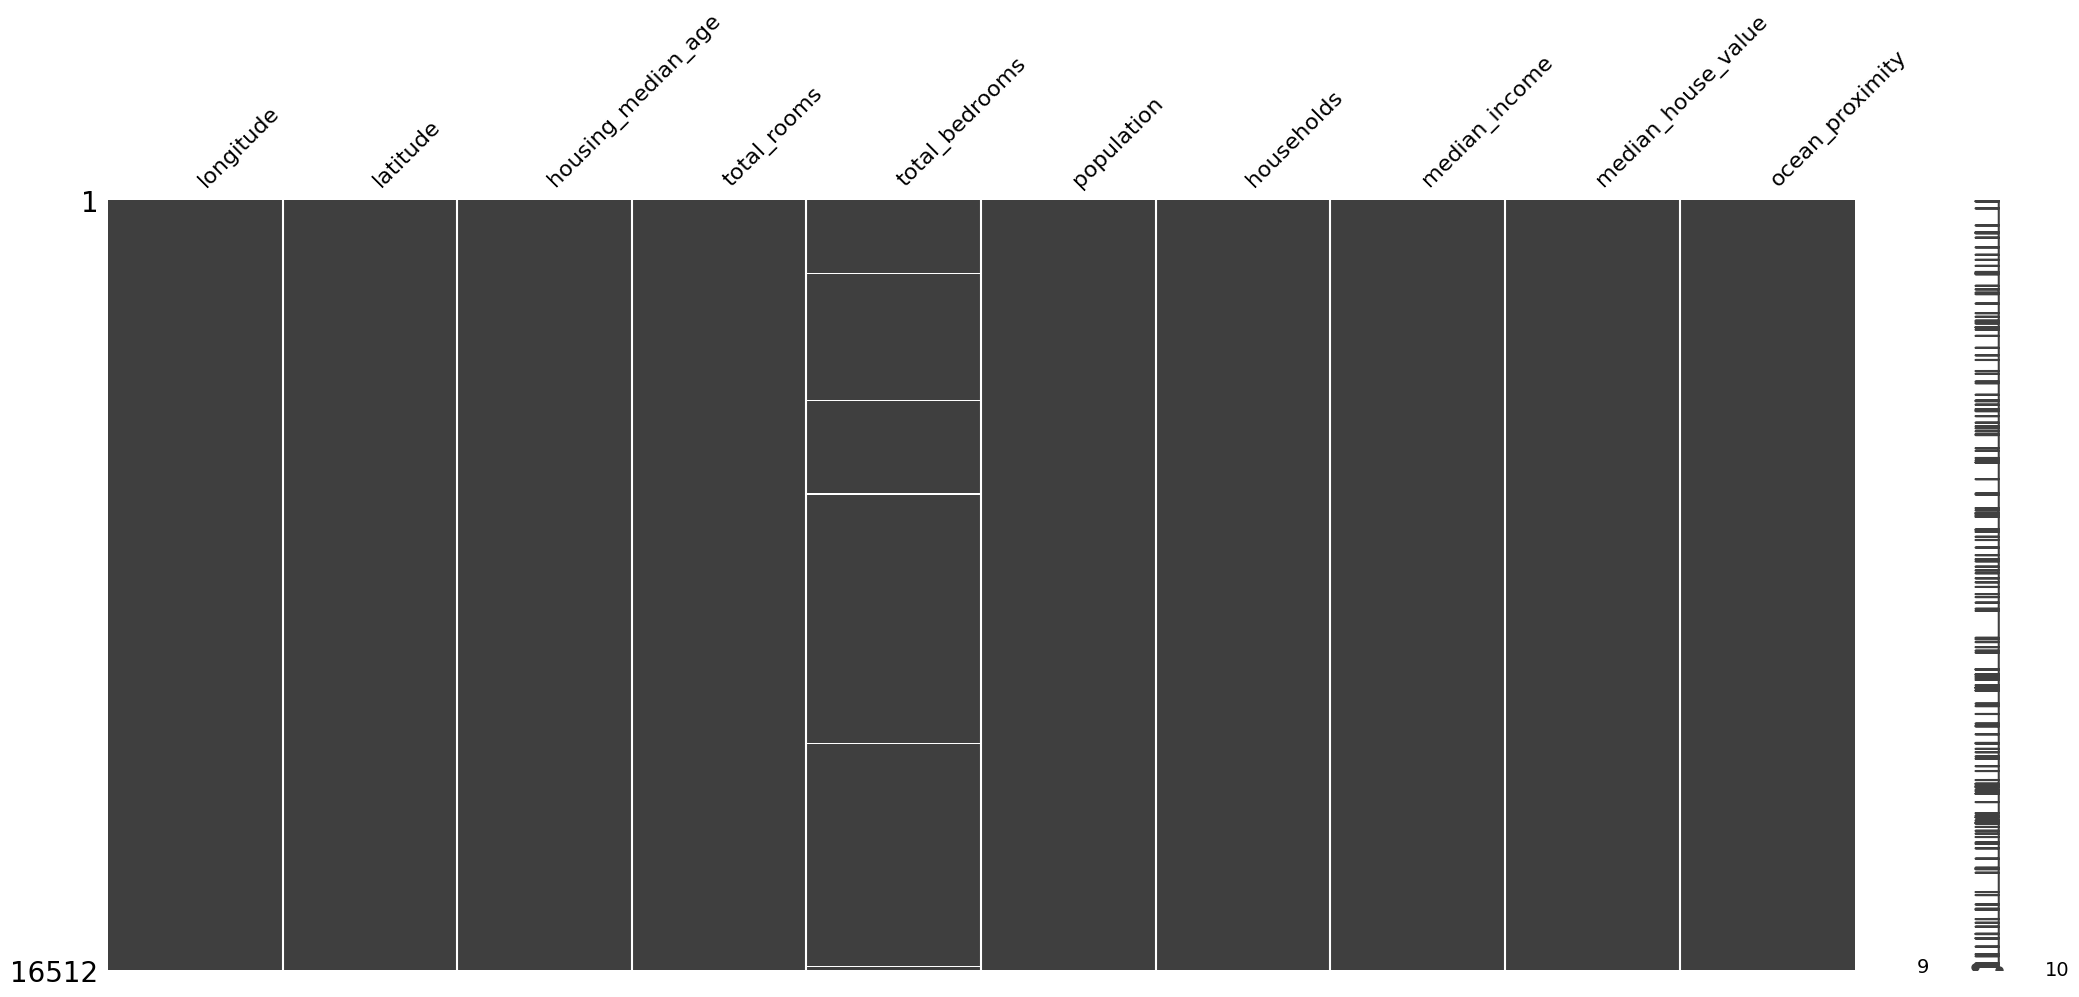

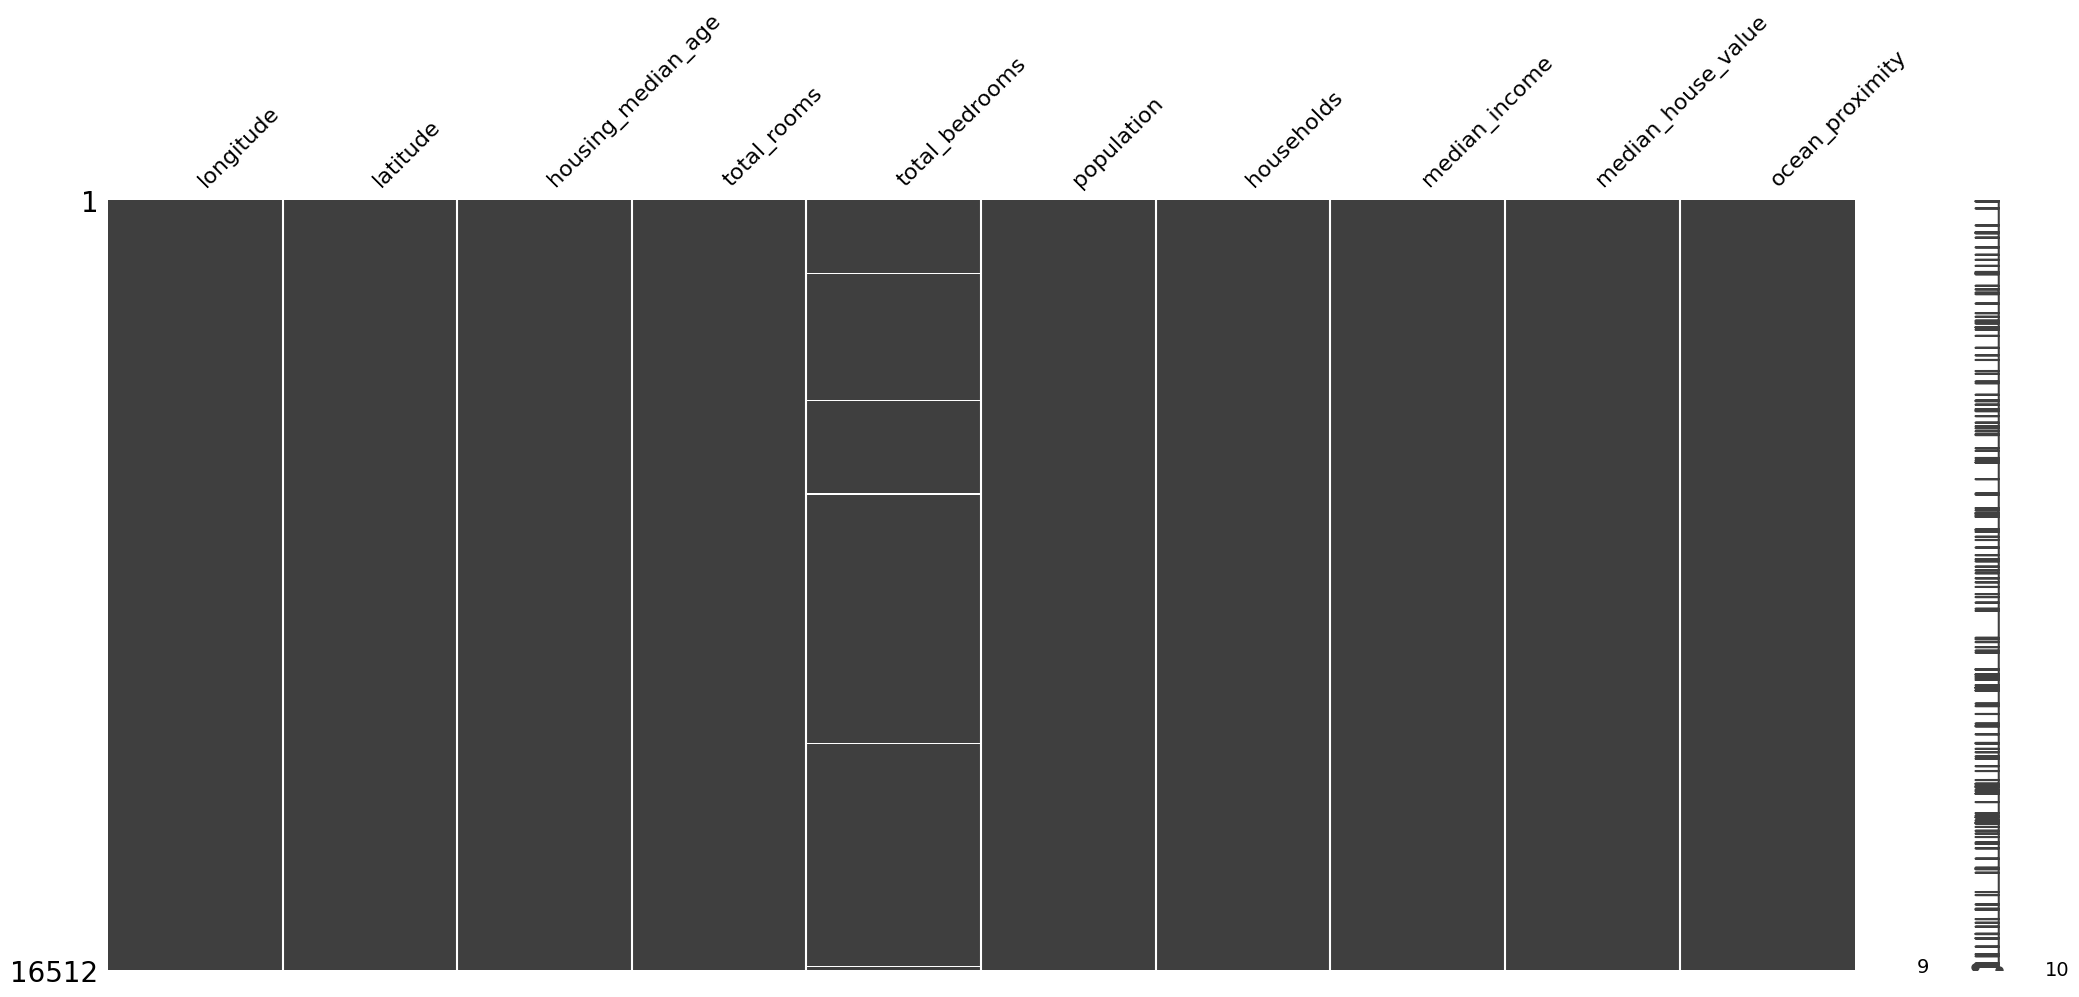

In [46]:
msno.matrix(housing)
plt.show()

In [47]:
housing["total_bedrooms"].describe()

count    16338.000000
mean       536.202473
std        419.913671
min          1.000000
25%        295.000000
50%        434.000000
75%        644.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

In [93]:
housing.isnull().any(axis=1).sum()

174

In [69]:
housing[housing.isnull().any(axis=1)].sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1891,-121.47,38.61,31.0,1072.0,NaN,781.0,281.0,1.6563,65800.0,INLAND
9750,-117.14,32.90,16.0,3217.0,NaN,2054.0,687.0,4.2234,162100.0,<1H OCEAN
12150,-122.91,38.46,18.0,2021.0,NaN,912.0,329.0,4.5000,251900.0,<1H OCEAN
7709,-122.46,37.72,39.0,2254.0,NaN,1388.0,404.0,2.9688,232000.0,NEAR OCEAN
17065,-122.42,40.44,16.0,994.0,NaN,495.0,181.0,2.1875,76400.0,INLAND
8713,-118.36,34.05,45.0,2283.0,NaN,1093.0,475.0,2.5658,252000.0,<1H OCEAN
7701,-118.37,34.03,37.0,1236.0,NaN,966.0,292.0,3.0694,122200.0,<1H OCEAN
7999,-120.93,37.73,14.0,2799.0,NaN,2294.0,596.0,2.6343,81500.0,INLAND
3111,-117.14,32.71,52.0,500.0,NaN,480.0,108.0,1.8696,91100.0,NEAR OCEAN
9584,-117.92,33.87,33.0,1597.0,NaN,1888.0,423.0,3.0550,157800.0,<1H OCEAN


In [98]:
housing_num = housing.select_dtypes(include=[np.number])

housing_num.mean()

longitude               -119.577683
latitude                  35.635805
housing_median_age        28.649346
total_rooms             2626.708152
total_bedrooms           536.202473
population              1423.349746
households               498.582728
median_income              3.867104
median_house_value    206608.566497
dtype: float64

In [99]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

imputer.fit(housing_num)

imputer.statistics_

array([-1.1850e+02,  3.4260e+01,  2.9000e+01,  2.1220e+03,  4.3400e+02,
        1.1640e+03,  4.0900e+02,  3.5377e+00,  1.7980e+05])

In [100]:
X = imputer.transform(housing_num)
X

array([[-1.1972e+02,  3.6320e+01,  4.0000e+01, ...,  2.5600e+02,
         2.2721e+00,  5.2600e+04],
       [-1.1814e+02,  3.4160e+01,  3.6000e+01, ...,  7.8400e+02,
         2.6217e+00,  1.5630e+05],
       [-1.1736e+02,  3.3880e+01,  1.5000e+01, ...,  3.8200e+02,
         4.6875e+00,  1.8980e+05],
       ...,
       [-1.1835e+02,  3.4220e+01,  1.9000e+01, ...,  1.5950e+03,
         5.9970e+00,  2.2870e+05],
       [-1.1837e+02,  3.3870e+01,  1.3000e+01, ...,  6.9400e+02,
         3.5048e+00,  2.9400e+05],
       [-1.1818e+02,  3.4030e+01,  4.0000e+01, ...,  6.7700e+02,
         2.0764e+00,  1.4560e+05]])

In [101]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

housing_tr.loc[housing[housing.isnull().any(axis=1)].index]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
6380,-117.02,32.78,31.0,2567.0,434.0,1198.0,499.0,3.4659,163000.0
8305,-118.19,33.98,36.0,4179.0,434.0,4582.0,1196.0,2.0087,172100.0
5946,-119.68,36.79,16.0,1551.0,434.0,1010.0,292.0,3.5417,71300.0
9030,-117.23,32.75,5.0,1824.0,434.0,892.0,426.0,3.4286,137500.0
13862,-117.34,33.94,13.0,7910.0,434.0,3382.0,1176.0,5.5563,214500.0
...,...,...,...,...,...,...,...,...,...
13093,-122.16,37.45,47.0,4234.0,434.0,1808.0,1093.0,4.2297,425000.0
6563,-118.28,34.06,42.0,2472.0,434.0,3795.0,1179.0,1.2254,162500.0
7434,-117.73,34.10,37.0,3457.0,434.0,1344.0,530.0,5.8891,226000.0
495,-114.59,34.83,41.0,812.0,434.0,375.0,158.0,1.7083,48500.0


In [94]:
housing_tr.isnull().any(axis=1).sum()

0

In [103]:
from sklearn.impute import SimpleImputer

# Select the numerical columns from the housing dataframe
housing_num = housing.select_dtypes(include=[np.number])

# Create an instance of SimpleImputer with median strategy
imputer = SimpleImputer(strategy="median")

# Fit the imputer on the numerical columns
X = imputer.fit_transform(housing_num)

# Create a new dataframe with the imputed values
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

# Display the first few rows of the transformed dataframe
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
7920,-119.72,36.32,40.0,1185.0,221.0,676.0,256.0,2.2721,52600.0
16993,-118.14,34.16,36.0,2973.0,807.0,2846.0,784.0,2.6217,156300.0
16589,-117.36,33.88,15.0,2857.0,421.0,1361.0,382.0,4.6875,189800.0
15643,-122.00,37.33,30.0,4033.0,794.0,1788.0,807.0,5.6932,338700.0
8697,-122.28,37.90,52.0,2261.0,328.0,819.0,335.0,4.9083,346800.0


# Feature Scaling

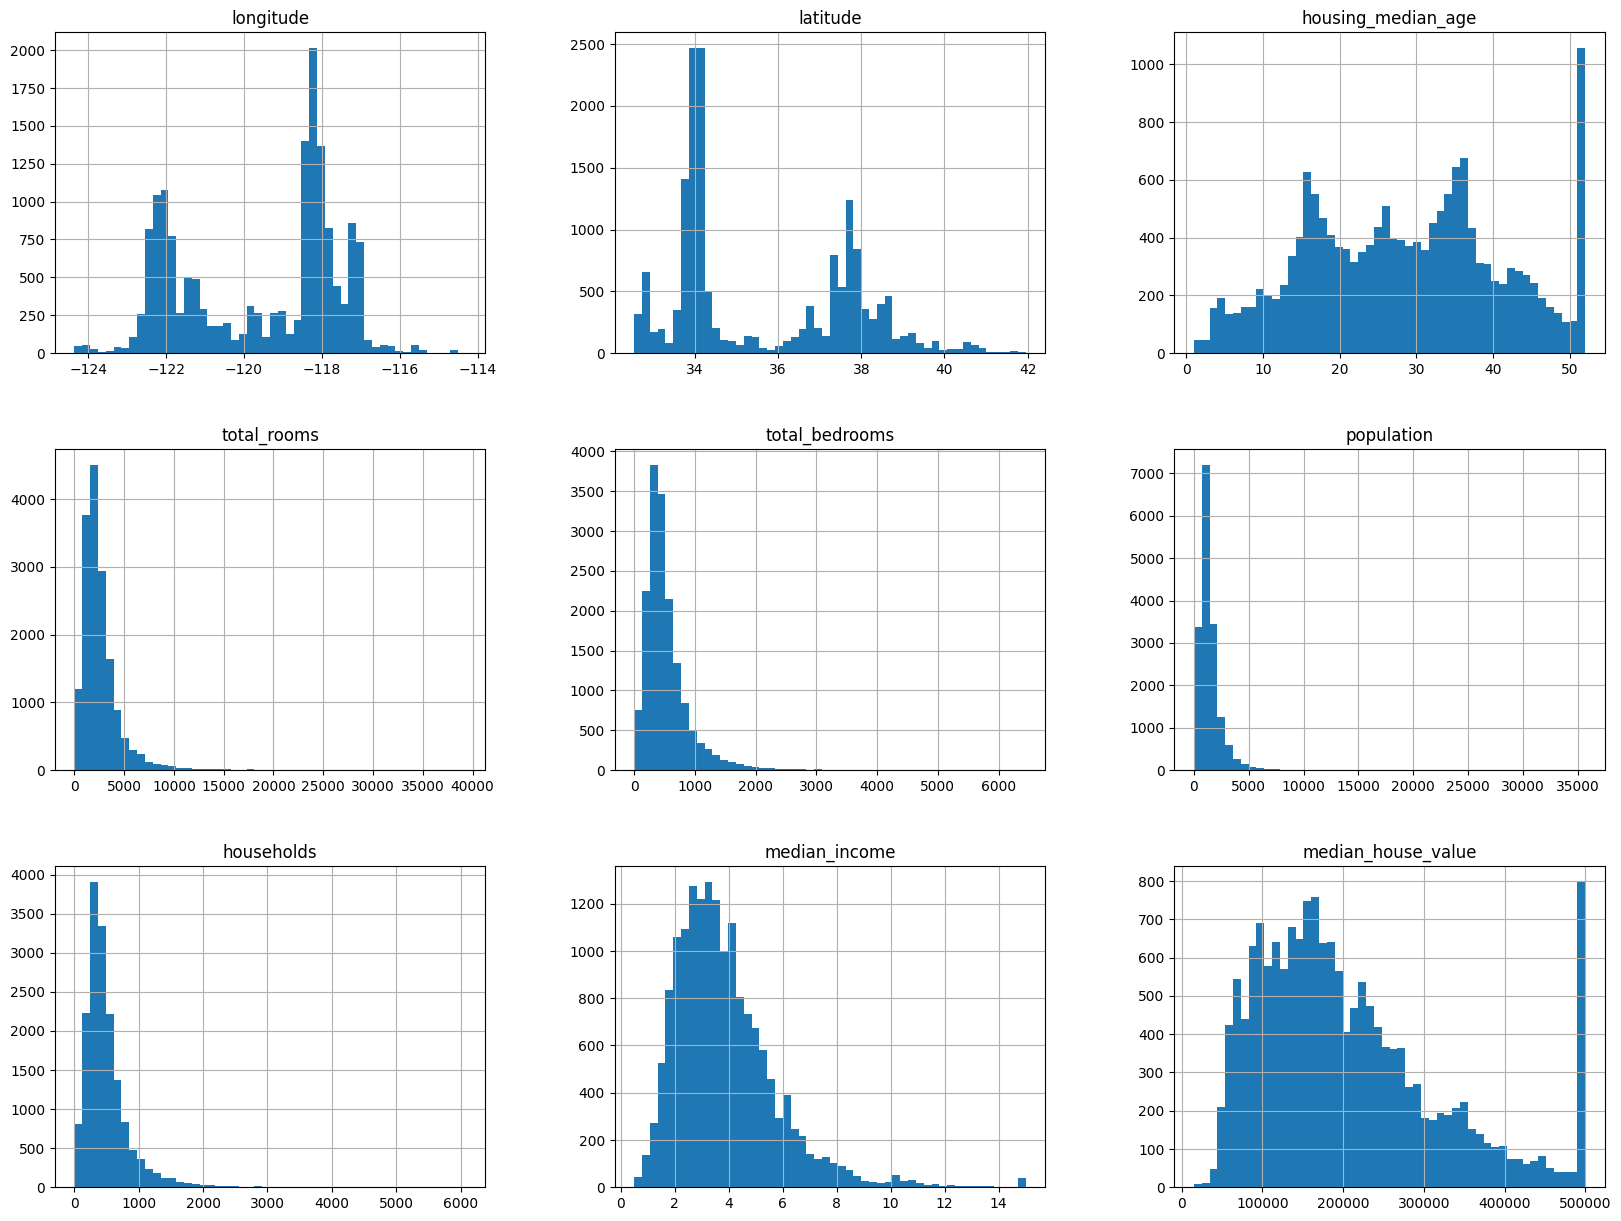

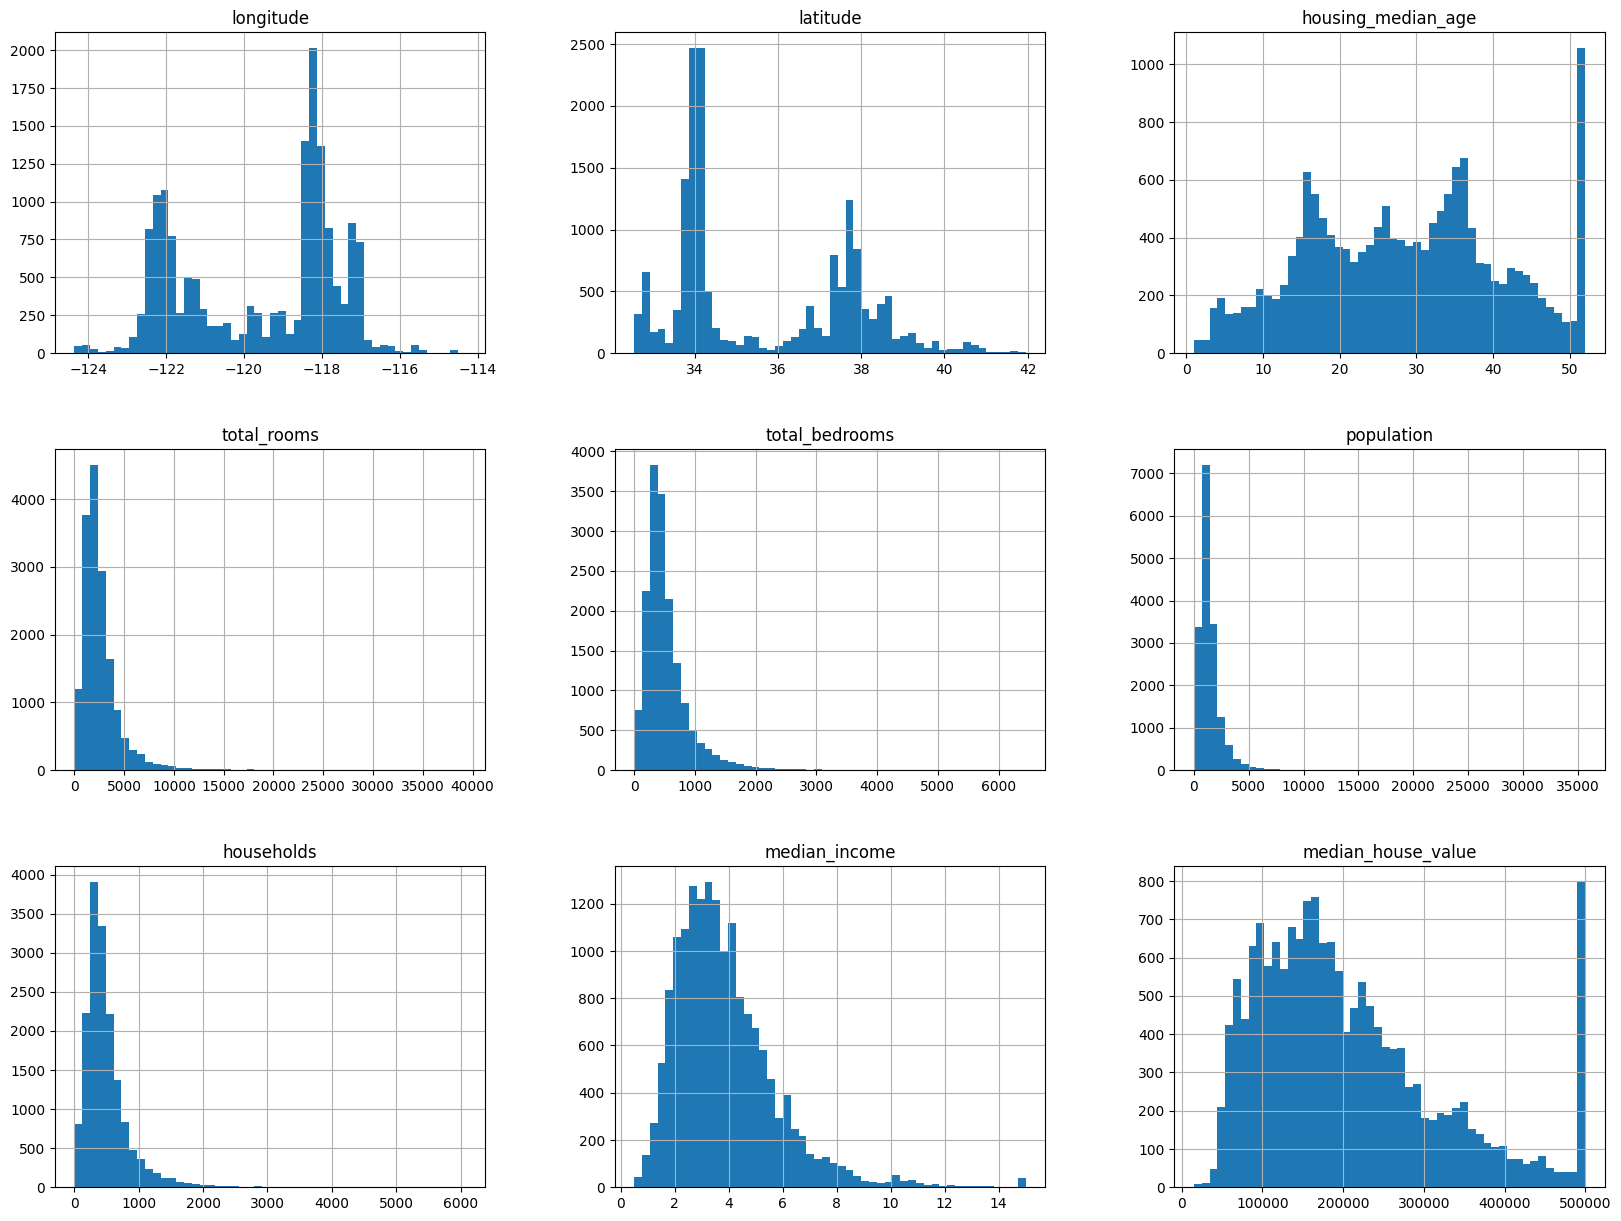

In [105]:
housing_tr.hist(bins=50, figsize=(20, 15))
plt.show()

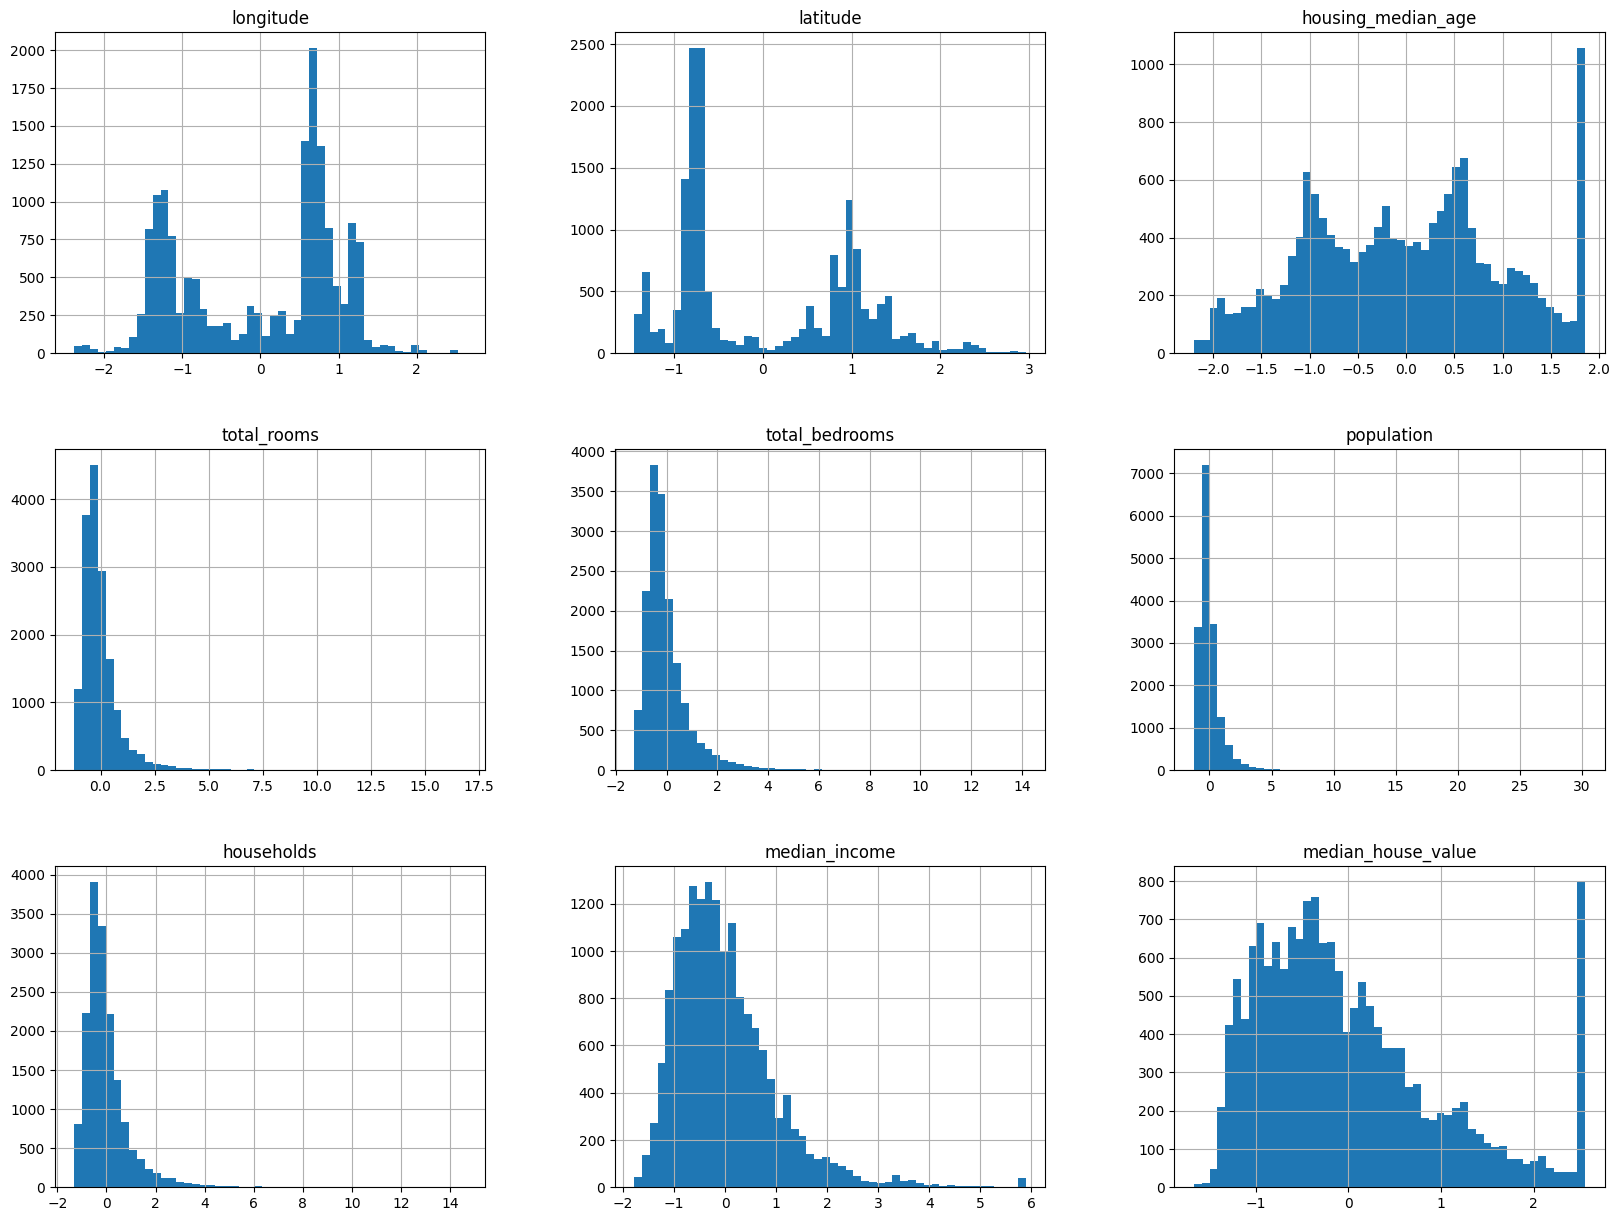

In [107]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_tr)
# type(housing_num_std_scaled)

housing_num_std_scaled_df = pd.DataFrame(
    housing_num_std_scaled, columns=housing_num.columns, index=housing_num.index
)

housing_num_std_scaled_df.hist(bins=50, figsize=(20, 15))
plt.show()

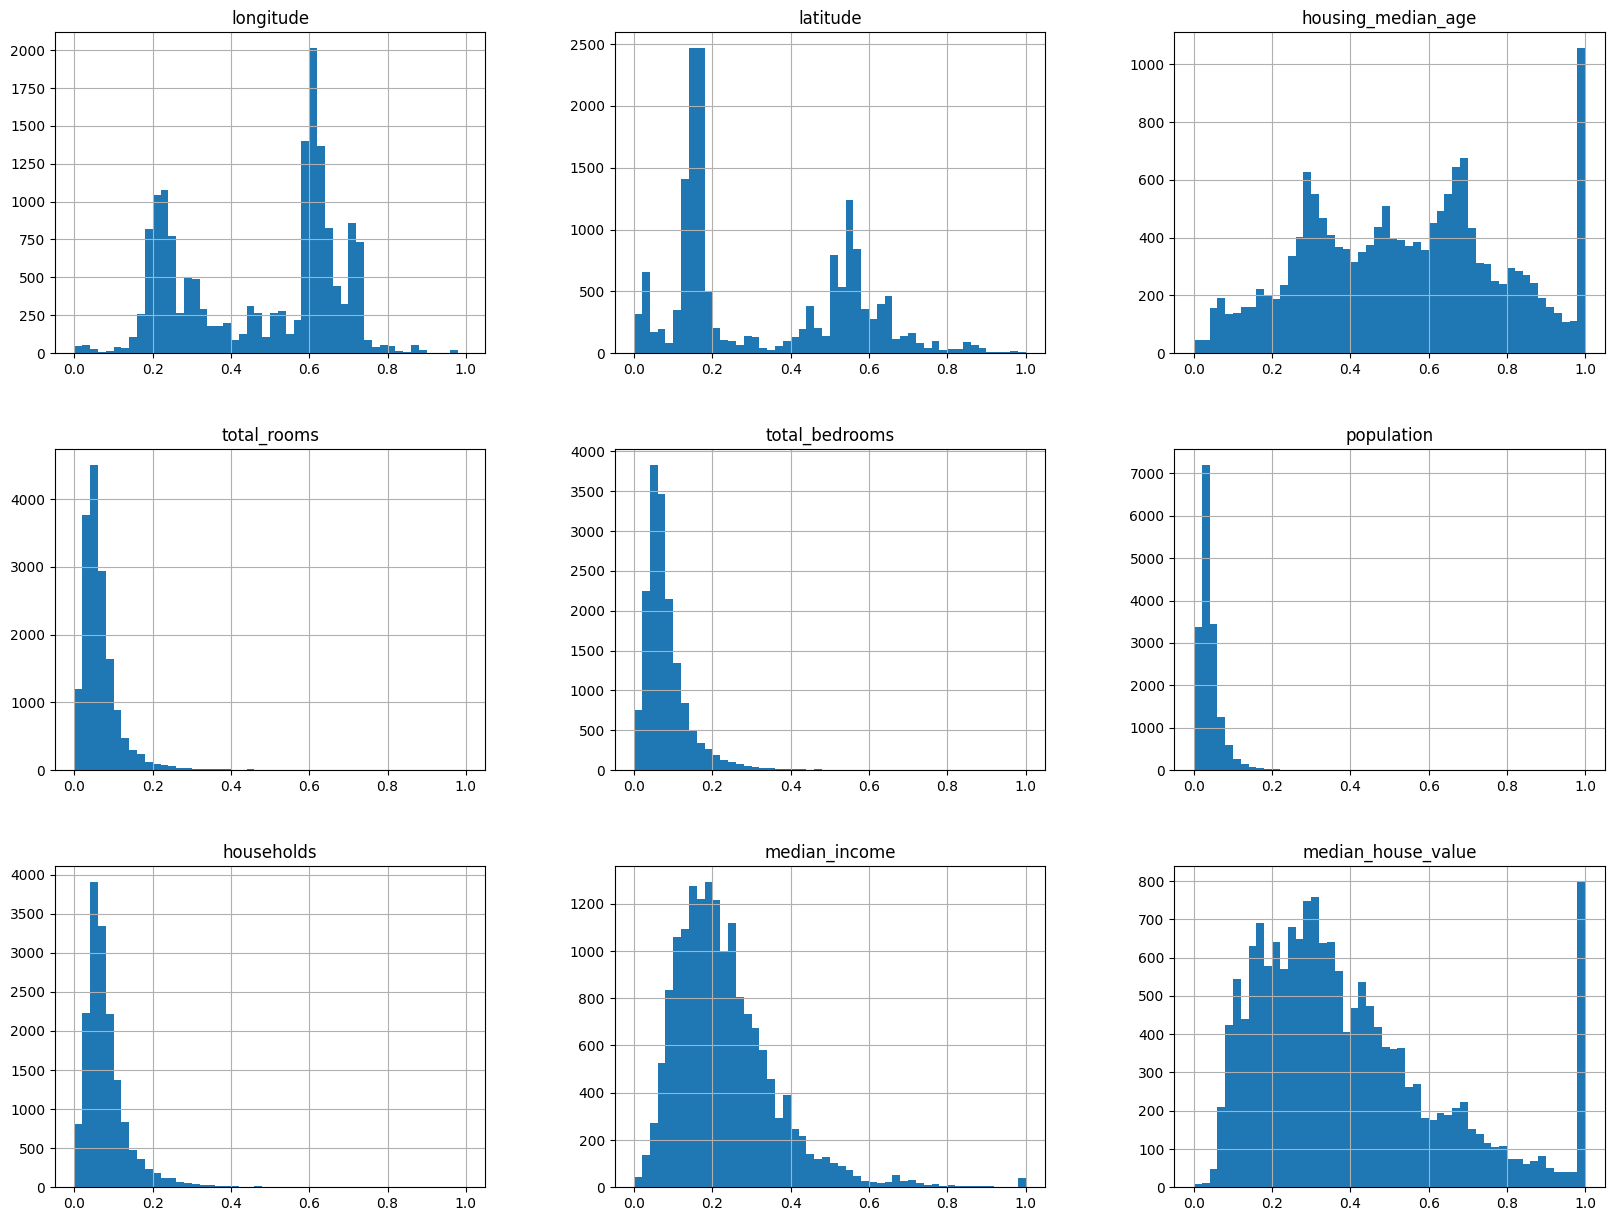

In [108]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_tr)
# type(housing_num_min_max_scaled)

housing_num_min_max_scaled_df = pd.DataFrame(
    housing_num_min_max_scaled, columns=housing_num.columns, index=housing_num.index
)

housing_num_min_max_scaled_df.hist(bins=50, figsize=(20, 15))
plt.show()

# Handling Categorical Variables

In [113]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head()

,ocean_proximity
7920,INLAND
16993,<1H OCEAN
16589,INLAND
15643,<1H OCEAN
8697,NEAR BAY


In [119]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
type(housing_cat_encoded)

housing_cat_encoded_df = pd.DataFrame(
    housing_cat_encoded, columns=housing_cat.columns, index=housing_cat.index
)

print(ordinal_encoder.categories_)

housing_cat_encoded_df.head()

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


,ocean_proximity
7920,1.0
16993,0.0
16589,1.0
15643,0.0
8697,3.0


## Homework: Apply One Hot Encoding